In [27]:
#Loads the dataset from the CSV file
import pandas as pd
data=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\3rd sem ppts\houseing.csv")

In [28]:
data.head()

,TotalRoom,YearBuilt,SalePrice,Unnamed: 3
0,7.0,2003,789000.0,NaN
1,2.0,1976,123465.0,NaN
2,4.0,2001,200000.0,NaN
3,NaN,1915,181500.0,NaN
4,7.0,1931,NaN,NaN


In [30]:
data = [7, 8, 4 , 3 ,2]
House_counts = pd.Series(data, name='rooms')
print(House_counts)

0    7
1    8
2    4
3    3
4    2
Name: rooms, dtype: int64


In [31]:
YearBuilt = [2002, 2003, 2000, 1953, 1976]
joined_data = list(zip(data, YearBuilt))
activity_df = pd.DataFrame(joined_data)
print(activity_df)

   0     1
0  7  2002
1  8  2003
2  4  2000
3  3  1953
4  2  1976


In [32]:
YearBuilt = [2002, 2003, 2000, 1953, 1976]
joined_data = list(zip(data, YearBuilt))
activity_df = pd.DataFrame(joined_data)
print(activity_df)

   0     1
0  7  2002
1  8  2003
2  4  2000
3  3  1953
4  2  1976


In [37]:
activity_df = pd.DataFrame(joined_data,
               index=pd.date_range('20200329', 
               periods=5),
               columns=['data','YearBuilt'])
print(activity_df)

            data  YearBuilt
2020-03-29     7       2002
2020-03-30     8       2003
2020-03-31     4       2000
2020-04-01     3       1953
2020-04-02     2       1976


In [40]:
activity_df.iloc[3:5]

,data,YearBuilt
2020-04-01,3,1953
2020-04-02,2,1976


In [41]:
activity_df["data"]

2020-03-29    7
2020-03-30    8
2020-03-31    4
2020-04-01    3
2020-04-02    2
Freq: D, Name: data, dtype: int64

In [42]:
activity_df["YearBuilt"]

2020-03-29    2002
2020-03-30    2003
2020-03-31    2000
2020-04-01    1953
2020-04-02    1976
Freq: D, Name: YearBuilt, dtype: int64

In [45]:
print(House_counts[1])

8


In [46]:
activity_df.iloc[-3]

data            4
YearBuilt    2000
Name: 2020-03-31 00:00:00, dtype: int64

TypeError: 'DataFrame' object is not callable

In [57]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\3rd sem ppts\houseing.csv")

In [58]:
data.head()

,TotalRoom,YearBuilt,SalePrice,Unnamed: 3
0,7.0,2003,789000.0,NaN
1,2.0,1976,123465.0,NaN
2,4.0,2001,200000.0,NaN
3,NaN,1915,181500.0,NaN
4,7.0,1931,NaN,NaN


In [59]:
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TotalRoom   7 non-null      float64
 1   YearBuilt   10 non-null     int64  
 2   SalePrice   9 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 452.0 bytes
None

Missing Values:
 TotalRoom      3
YearBuilt      0
SalePrice      1
Unnamed: 3    10
dtype: int64


In [60]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [62]:
print("\nCleaned Data Preview:")
print(df.head())


Cleaned Data Preview:
   TotalRoom  YearBuilt  SalePrice  Unnamed: 3
0        7.0       2003   789000.0         NaN
1        2.0       1976   123465.0         NaN
2        4.0       2001   200000.0         NaN
3        6.0       1915   181500.0         NaN
4        7.0       1931   200000.0         NaN


In [68]:
df['PricePerRoom'] = df['SalePrice'] / df['TotalRoom']
df['HouseAge'] = 2025 - df['YearBuilt']
df['Is_Expensive'] = (df['SalePrice'] > df['SalePrice'].median()).astype(int)

In [71]:
import seaborn as sns
sns.set(style="whitegrid")

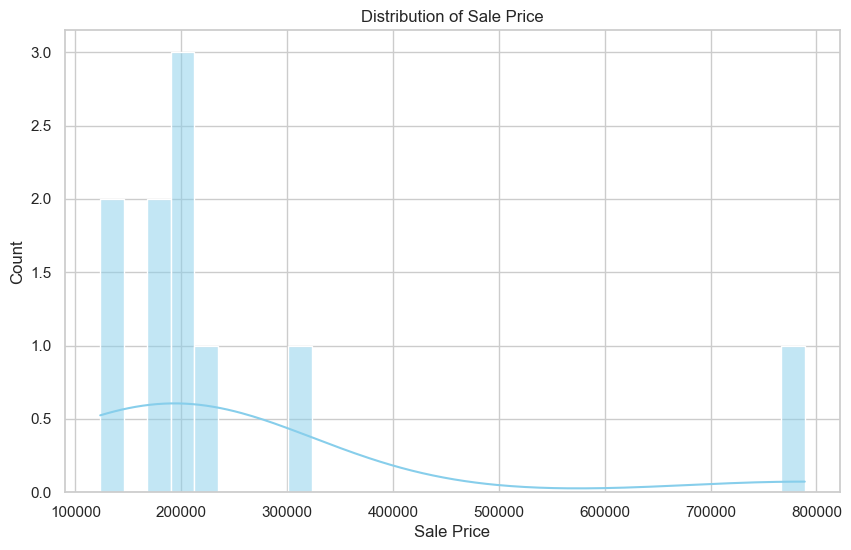

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.show()


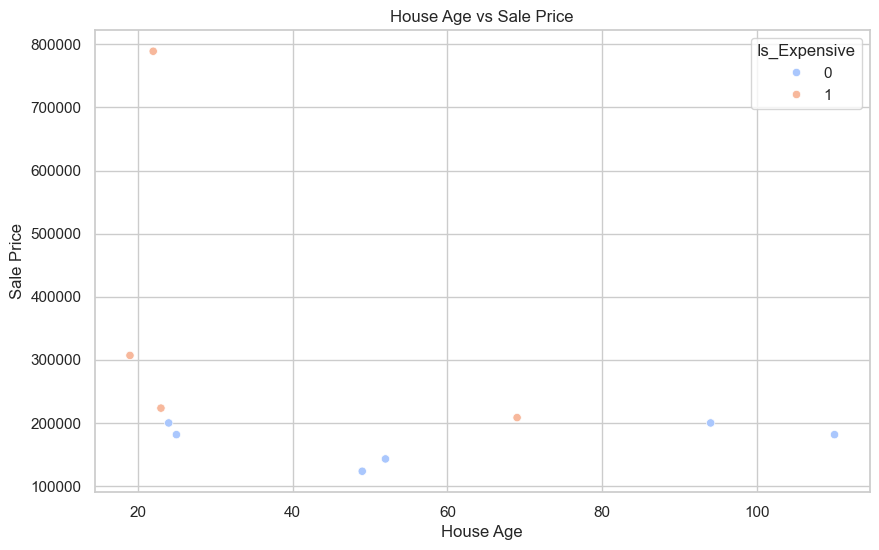

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HouseAge', y='SalePrice', hue='Is_Expensive', palette='coolwarm')
plt.title("House Age vs Sale Price")
plt.xlabel("House Age")
plt.ylabel("Sale Price")
plt.show()